# Analisis de Enzo Fernandez en Qatar 2022

In [28]:
import pandas as pd
import matplotlib.font_manager as fm
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch, Pitch
import seaborn as sns
import matplotlib.patheffects as path_effects

### Configuración de la tipografia y colores

In [2]:
font_path = r'C:\Users\PC\soc-viz-of-the-week-main\assets\fonts'


In [3]:
colors = [
    '#efe9e6',
    '#e9e1dd',
    '#e3dad3',
    '#dcd3c9',
    '#d4ccc0',
    '#ccc6b7',
    '#c3bfae',
    '#bab9a6',
    '#b0b39e',
    '#a6ad96',
    '#9ba790',
    '#90a18a',
    '#849b84',
    '#789680',
    '#6c907c',
    '#608a79',
    '#538476',
    '#467e74',
    '#387872',
    '#287271',
]
soc_cm = LinearSegmentedColormap.from_list('SOC', colors, N=50)
cm.register_cmap(name='SOC', cmap=soc_cm)

C:\Users\Ariel\AppData\Local\Temp\ipykernel_12364\405490639.py:24: MatplotlibDeprecationWarning: The register_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps.register(name)`` instead.
  cm.register_cmap(name='SOC', cmap=soc_cm)


## Cargamos los archivos a utilizar

In [4]:
#Cargamos todos los pases de Enzo Fernandez en el mundial
PassEF = pd.read_excel('PassEF.xlsx')
PassEF.head()

,Unnamed: 0,match_id,index,type,ball_receipt_outcome,dribble_outcome,duel_outcome,duel_type,interception_outcome,location,...,pass_outcome,pass_recipient,player,position,team,shot_outcome,location_x,location_y,pass_end_location_x,pass_end_location_y
0,48,3869685,127,Pass,NaN,NaN,NaN,NaN,NaN,"[54.8, 37.8]",...,complete,Cristian Gabriel Romero,Enzo Fernandez,Center Defensive Midfield,Argentina,NaN,54.8,37.8,56.5,60.5
1,55,3869685,149,Pass,NaN,NaN,NaN,NaN,NaN,"[82.4, 7.4]",...,complete,Alexis Mac Allister,Enzo Fernandez,Center Defensive Midfield,Argentina,NaN,82.4,7.4,96.1,14.3
2,102,3869685,306,Pass,NaN,NaN,NaN,NaN,NaN,"[34.3, 50.2]",...,complete,Lionel Andrés Messi Cuccittini,Enzo Fernandez,Center Defensive Midfield,Argentina,NaN,34.3,50.2,38.8,53.4
3,132,3869685,409,Pass,NaN,NaN,NaN,NaN,NaN,"[68.3, 51.1]",...,complete,Rodrigo Javier De Paul,Enzo Fernandez,Center Defensive Midfield,Argentina,NaN,68.3,51.1,76.9,63.9
4,149,3869685,470,Pass,NaN,NaN,NaN,NaN,NaN,"[31.5, 26.0]",...,complete,Nicolás Hernán Otamendi,Enzo Fernandez,Center Defensive Midfield,Argentina,NaN,31.5,26.0,23.6,19.6


In [5]:
#Cargamos todos los disparos al arco de Enzo Fernandez en el mundial
Shots = pd.read_excel('Shots.xlsx')
Shots.head()

,Unnamed: 0,match_id,index,type,ball_receipt_outcome,dribble_outcome,duel_outcome,duel_type,interception_outcome,location,pass_end_location,pass_goal_assist,pass_outcome,pass_recipient,player,position,team,shot_outcome,location_x,location_y
0,4218,3869685,2691,Shot,NaN,NaN,NaN,NaN,NaN,"[98.9, 32.2]",NaN,NaN,NaN,NaN,Enzo Fernandez,Center Defensive Midfield,Argentina,Saved,98.9,32.2
1,4221,3869685,3037,Shot,NaN,NaN,NaN,NaN,NaN,"[92.2, 35.9]",NaN,NaN,NaN,NaN,Enzo Fernandez,Center Defensive Midfield,Argentina,Blocked,92.2,35.9
2,4218,3869685,2691,Shot,NaN,NaN,NaN,NaN,NaN,"[98.9, 32.2]",NaN,NaN,NaN,NaN,Enzo Fernandez,Center Defensive Midfield,Argentina,Saved,98.9,32.2
3,4221,3869685,3037,Shot,NaN,NaN,NaN,NaN,NaN,"[92.2, 35.9]",NaN,NaN,NaN,NaN,Enzo Fernandez,Center Defensive Midfield,Argentina,Blocked,92.2,35.9
4,3029,3857300,2675,Shot,NaN,NaN,NaN,NaN,NaN,"[108.2, 39.6]",NaN,NaN,NaN,NaN,Enzo Fernandez,Left Defensive Midfield,Argentina,Off T,108.2,39.6


In [6]:
#Cargamos todos los eventos de Enzo Fernandez en el mundial
event = pd.read_excel('event.xlsx')
event.head()

,Unnamed: 0,match_id,index,type,ball_receipt_outcome,dribble_outcome,duel_outcome,duel_type,interception_outcome,location,pass_end_location,pass_goal_assist,pass_outcome,pass_recipient,player,position,team,shot_outcome,location_x,location_y
0,48,3869685,127,Pass,NaN,NaN,NaN,NaN,NaN,"[54.8, 37.8]","[56.5, 60.5]",NaN,NaN,Cristian Gabriel Romero,Enzo Fernandez,Center Defensive Midfield,Argentina,NaN,54.8,37.8
1,55,3869685,149,Pass,NaN,NaN,NaN,NaN,NaN,"[82.4, 7.4]","[96.1, 14.3]",NaN,NaN,Alexis Mac Allister,Enzo Fernandez,Center Defensive Midfield,Argentina,NaN,82.4,7.4
2,70,3869685,201,Pass,NaN,NaN,NaN,NaN,NaN,"[56.5, 39.7]","[66.4, 42.9]",NaN,Incomplete,NaN,Enzo Fernandez,Center Defensive Midfield,Argentina,NaN,56.5,39.7
3,102,3869685,306,Pass,NaN,NaN,NaN,NaN,NaN,"[34.3, 50.2]","[38.8, 53.4]",NaN,NaN,Lionel Andrés Messi Cuccittini,Enzo Fernandez,Center Defensive Midfield,Argentina,NaN,34.3,50.2
4,107,3869685,324,Pass,NaN,NaN,NaN,NaN,NaN,"[88.0, 23.9]","[93.7, 20.3]",NaN,Incomplete,Alexis Mac Allister,Enzo Fernandez,Center Defensive Midfield,Argentina,NaN,88.0,23.9


In [7]:
#Cargamos todas las acciones defensivas de Enzo Fernandez en el mundial
DefEF = pd.read_excel('DefEF.xlsx')
DefEF.head()

,Unnamed: 0,match_id,index,type,ball_receipt_outcome,dribble_outcome,duel_outcome,duel_type,interception_outcome,location,pass_end_location,pass_goal_assist,pass_outcome,pass_recipient,player,position,team,shot_outcome,location_x,location_y
0,3992,3869685,1424,Clearance,NaN,NaN,NaN,NaN,NaN,"[47.7, 51.3]",NaN,NaN,NaN,NaN,Enzo Fernandez,Center Defensive Midfield,Argentina,NaN,47.7,51.3
1,3994,3869685,1589,Clearance,NaN,NaN,NaN,NaN,NaN,"[33.2, 59.8]",NaN,NaN,NaN,NaN,Enzo Fernandez,Center Defensive Midfield,Argentina,NaN,33.2,59.8
2,4018,3869685,3807,Clearance,NaN,NaN,NaN,NaN,NaN,"[4.6, 51.7]",NaN,NaN,NaN,NaN,Enzo Fernandez,Center Defensive Midfield,Argentina,NaN,4.6,51.7
3,4030,3869685,330,Duel,NaN,NaN,Success In Play,Tackle,NaN,"[89.0, 24.1]",NaN,NaN,NaN,NaN,Enzo Fernandez,Center Defensive Midfield,Argentina,NaN,89.0,24.1
4,4038,3869685,518,Duel,NaN,NaN,Success In Play,Tackle,NaN,"[40.3, 21.1]",NaN,NaN,NaN,NaN,Enzo Fernandez,Center Defensive Midfield,Argentina,NaN,40.3,21.1


Text(0.5, 0.98, 'Disparos de Enzo Fernandez en Qatar 2022')

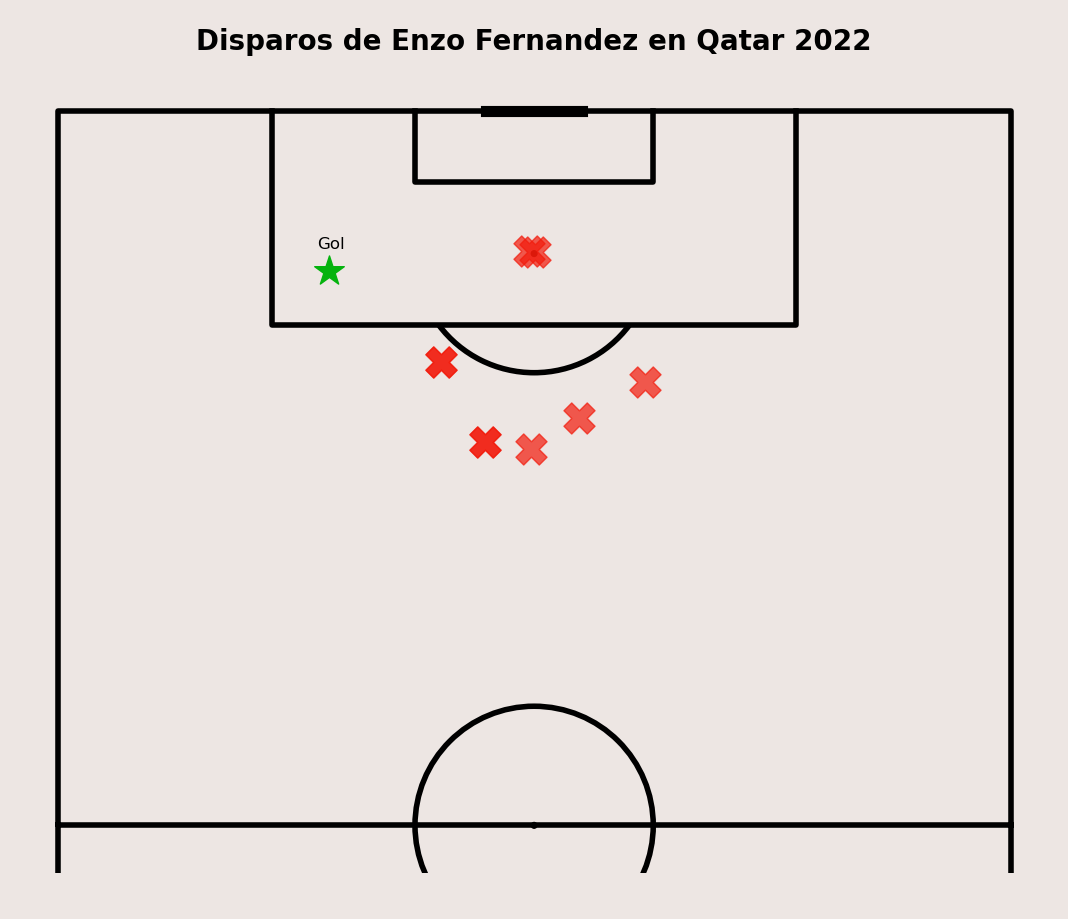

In [8]:
#Graficamos los disparos
pitch = VerticalPitch(linewidth=4, line_color='black', pitch_color = '#ede6e3', half = True)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

fig.set_facecolor('#ede6e3')

#Creamos una funcion para que resalte los disparos que terminaron en gol.
for i, row in Shots.iterrows():
    if row["shot_outcome"] == 'Goal':
       pitch.scatter(row.location_x, row.location_y, alpha = 1, s = 500, color = "#05b30e", ax=ax['pitch'], marker = '*') 
       pitch.annotate('Gol', (row.location_x + 2, row.location_y - 1), ax=ax['pitch'], fontsize = 12)
    else: 
        pitch.scatter(row.location_x, row.location_y, alpha = 0.7, s = 500, color = "#f21b0c", ax=ax['pitch'], marker = 'X') 
       
fig.suptitle("Disparos de Enzo Fernandez en Qatar 2022", fontsize = 20, fontweight ="bold")
#plt.savefig("ShotsEF.png",dpi = 1000,transparent = False)

d:\Users\Ariel\anaconda3\Lib\site-packages\mplsoccer\_pitch_plot.py:171: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  return sns.kdeplot(x=x, y=y, ax=ax, clip=self.kde_clip, **kwargs)


Text(0.5, 0.98, 'Mapa de calor de Enzo Fernandez en Qatar 2022')

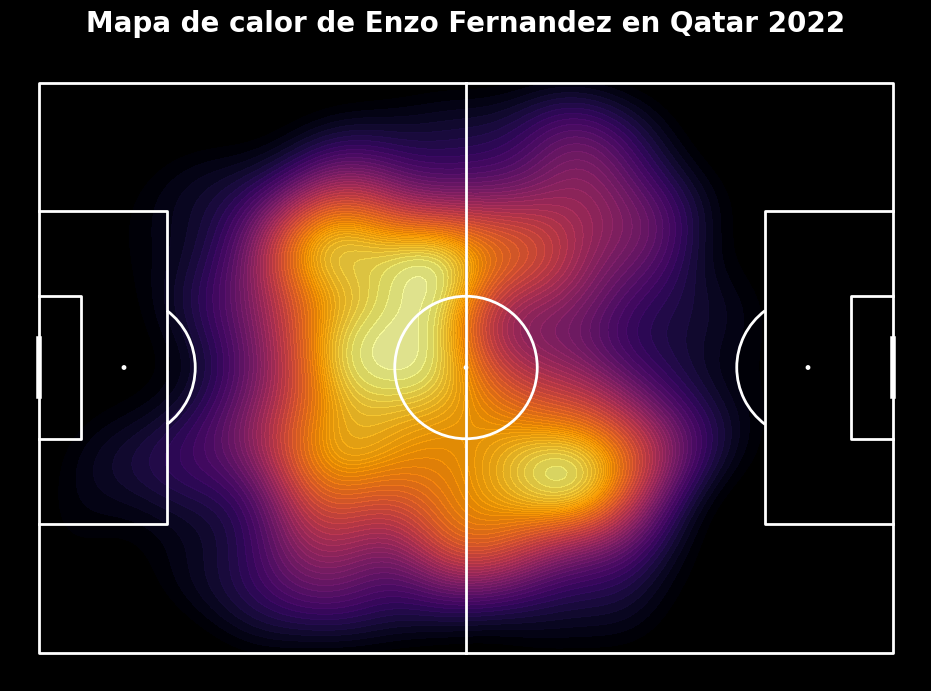

In [9]:
#Graficamos el mapa de calor durante el torneo
pitch = Pitch(line_color = "white", pitch_color = 'black')
fig, ax = pitch.draw(figsize=(10, 7))
fig.set_facecolor('black')

kde = pitch.kdeplot(event['location_x'], event['location_y'], alpha = .9, ax=ax, shade=True, n_levels=50,
                  shade_lowest=False,cut=1, zorder=-1, cmap = 'inferno')
                  
fig.suptitle("Mapa de calor de Enzo Fernandez en Qatar 2022", color = 'white',fontsize = 20, fontweight ="bold")
#plt.savefig("heatmapEF.png",dpi = 1000,transparent = False)

Text(0.5, 0.98, 'Acciones defensivas de  Enzo Fernandez en Qatar 2022')

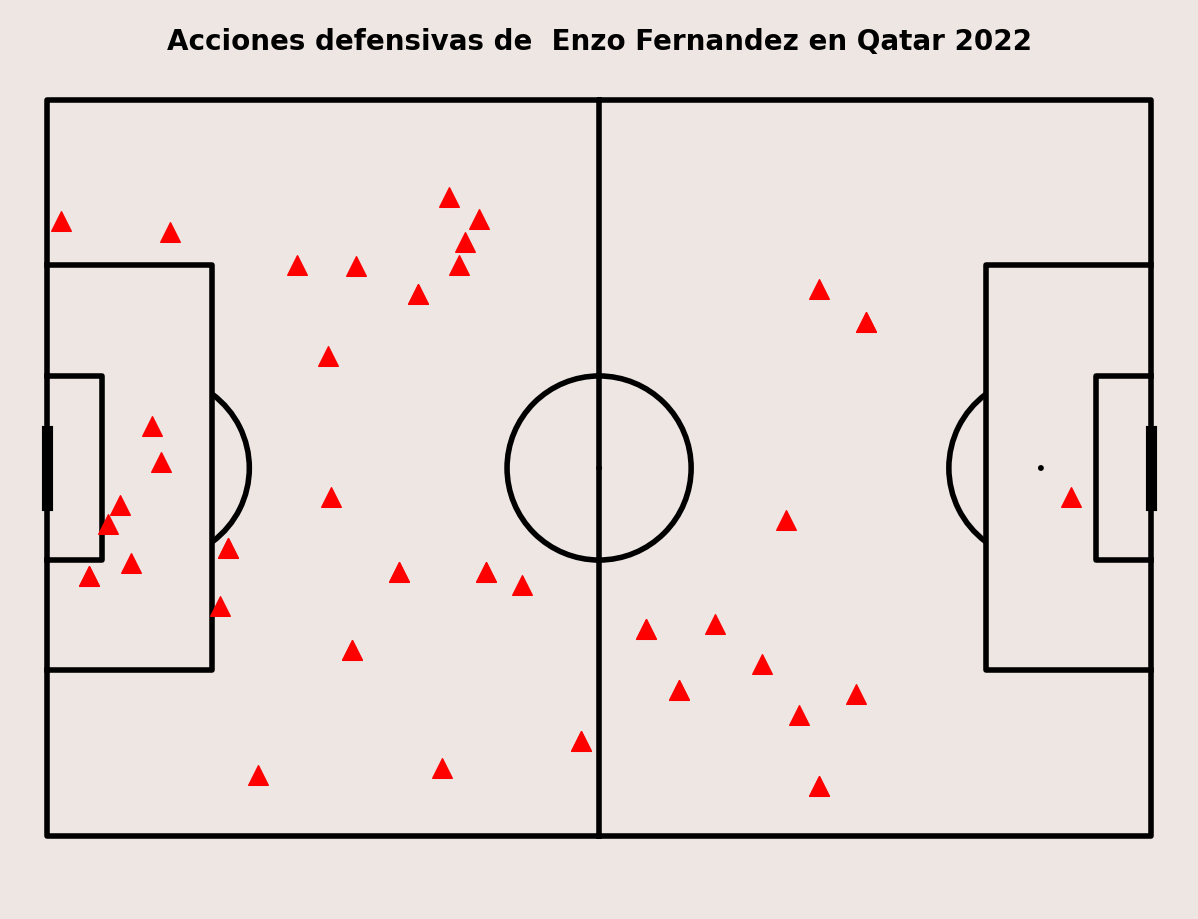

In [10]:
#Graficamos las acciones defensivas
pitch = Pitch(linewidth=4, line_color='black', pitch_color = '#ede6e3')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

fig.set_facecolor('#ede6e3')

pitch.scatter(DefEF.location_x, DefEF.location_y, alpha = 1, s = 200, color = "red", ax=ax['pitch'], marker = '^')

fig.suptitle("Acciones defensivas de  Enzo Fernandez en Qatar 2022", fontsize = 20, fontweight ="bold")
#plt.savefig("DefEF.png",dpi = 1000,transparent = False)

In [12]:
path_eff = [path_effects.Stroke(linewidth=3, foreground='black'),
            path_effects.Normal()]

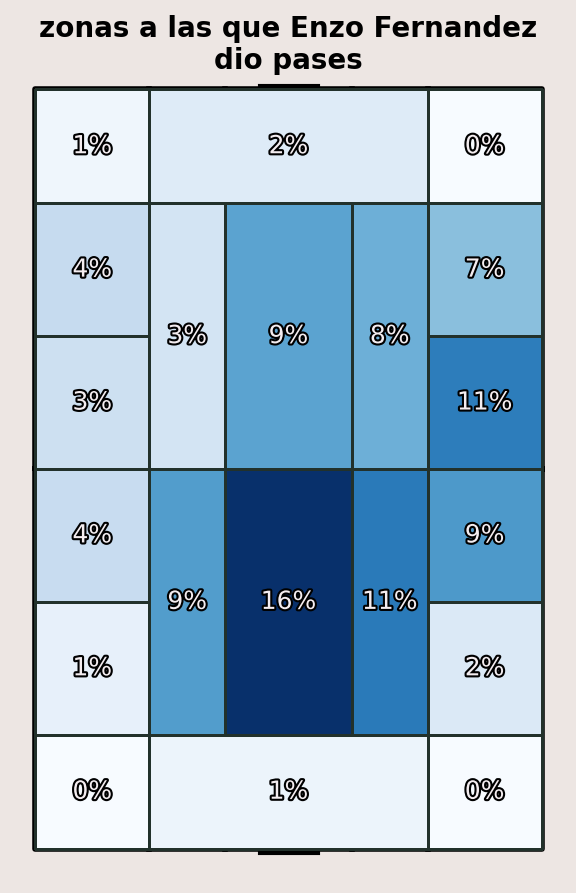

In [31]:
pitch = VerticalPitch(linewidth=4, line_color='black', pitch_color = '#ede6e3')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.01, title_space=0, endnote_space=0)

bin_statistic = pitch.bin_statistic_positional(PassEF.pass_end_location_x, PassEF.pass_end_location_y,
                                               statistic='count', positional='full', normalize=True)

pitch.heatmap_positional(bin_statistic, ax=ax['pitch'],
                         cmap='Blues', edgecolors='#22312b')

labels = pitch.label_heatmap(bin_statistic, color='#f4edf0', fontsize=18,ax=ax['pitch'], ha='center', va='center',
                             str_format='{:.0%}', path_effects=path_eff)

fig.suptitle("zonas a las que Enzo Fernandez\ndio pases", fontsize = 20, fontweight ="bold")

fig.set_facecolor('#ede6e3')

#plt.savefig("PassesEF.png",dpi = 1000,transparent = False)